<a href="https://colab.research.google.com/github/vicentemf/Analise-setor-bancario/blob/main/Recupera%C3%A7%C3%A3o_banc%C3%A1ria_p%C3%B3s_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Este código tem como objetivo analisar a recuperação da cotação das ações dos três maiores bancos privados listados na B3 após a queda relacionada a crise da COVID-19 bem como o seu pagamento de proventos .


In [28]:
#importando bibliotecas 
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#aqui foram escolhidos os 3 maiores bancos privados listados na B3
bancos =['ITUB4.SA','BBDC4.SA','SANB4.SA'] 

In [29]:
#Período relacionado a volatilidade ,fundo até o topo,causada pela COVID-19
inicio='2020-03-23'  
fim=  '2021-06-07'

In [30]:
cotação=pd.DataFrame()
for i in bancos :
 cotação[i]=yf.download(i,inicio,fim) ['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
cotação

,ITUB4.SA,BBDC4.SA,SANB4.SA
Date,,,
2020-03-23,19.525852,12.335443,10.440290
2020-03-24,21.409922,14.192389,11.980235
2020-03-25,22.456629,15.253503,12.615352
2020-03-26,23.075138,15.574633,13.572379
2020-03-27,21.857151,14.562381,12.354343
...,...,...,...
2021-05-28,28.920851,23.072538,19.808380
2021-05-31,28.833004,23.020376,19.652336
2021-06-01,29.882809,23.541988,20.386660


Text(0, 0.5, 'Cotação')

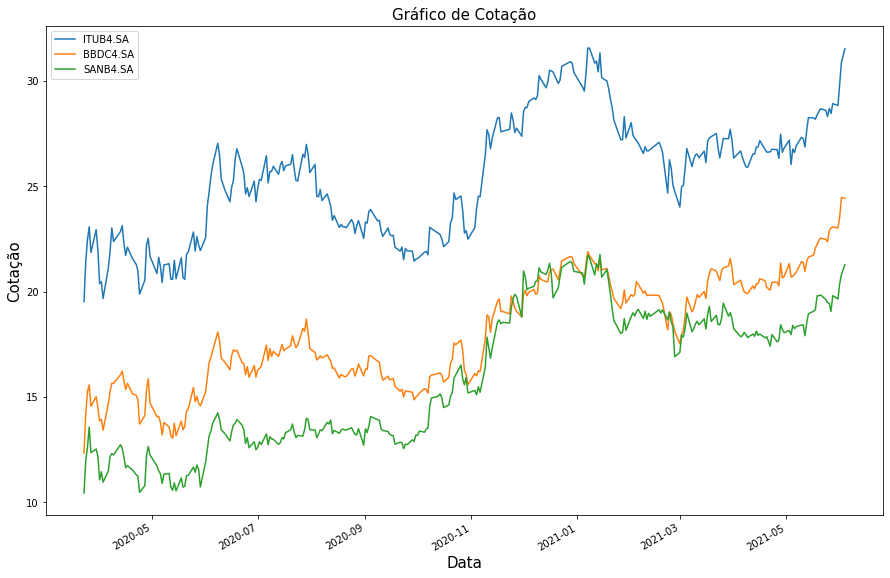

In [32]:
cotação.plot(figsize=(15,10))
plt.title("Gráfico de Cotação",fontsize=15)
plt.xlabel("Data",fontsize=15)
plt.ylabel("Cotação",fontsize=15)

##No gráfico apresentado é possível ver a evolução da cotação durante o período proposto,entretanto,ele não consegue dimensionar qual banco teve uma melhor recuperação pois estão em escalas diferentes. Sendo assim,a melhor solução consiste na normalização do gráfico pois se todos partirem do mesmo ponto, poderemos ter idéia de qual papel performou melhor.

In [33]:
#Retorno diário do papel através do método pct_change .
retorno=cotação.pct_change()
retorno.dropna(inplace=True)
retorno.rename(columns={"ITUB4.SA":"itau","BBDC4.SA":"bradesco","SANB4.SA":"santander"},inplace=True)
round(retorno*100,2)

,itau,bradesco,santander
Date,,,
2020-03-24,9.65,15.05,14.75
2020-03-25,4.89,7.48,5.30
2020-03-26,2.75,2.11,7.59
2020-03-27,-5.28,-6.50,-8.97
2020-03-30,4.96,3.12,1.41
...,...,...,...
2021-05-28,1.65,0.23,3.90
2021-05-31,-0.30,-0.23,-0.79
2021-06-01,3.64,2.27,3.74


Text(0, 0.5, 'Data')

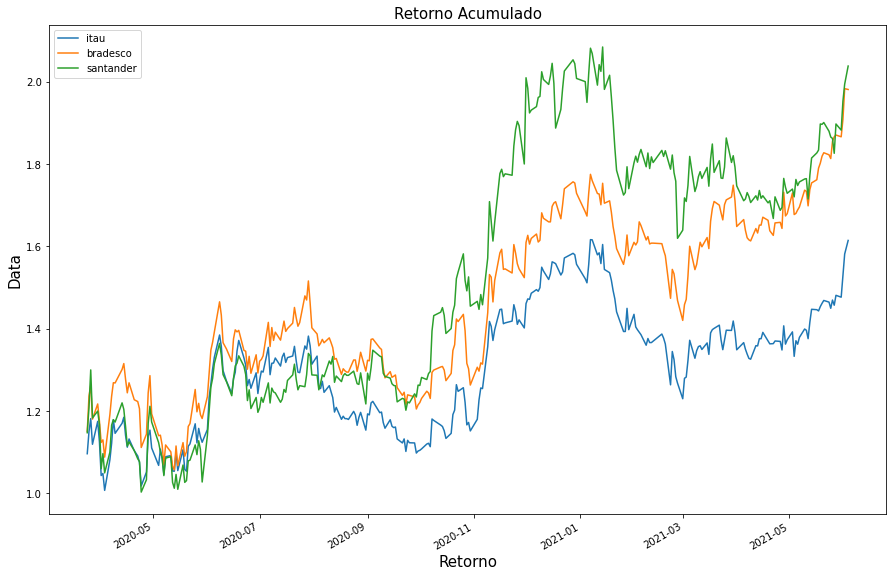

In [34]:
#O retorno acumulado nos trás uma dimensão da performance e comparação dos papéis escolhidos.
ret_acumulado=(retorno + 1).cumprod()
ret_acumulado.plot(figsize=(15,10))
plt.title("Retorno Acumulado",fontsize=15)
plt.xlabel("Retorno",fontsize=15)
plt.ylabel("Data",fontsize=15)

###O gráfico do retorno acumulado nos permite perceber que os papéis SANB4 e BBDC4 chegaram a um valor nominal de 100% de retorno enquanto ações ITUB4 renderam pouco mais que 50% .

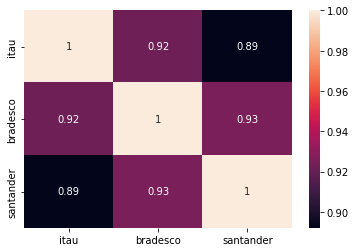

In [35]:
#Graficamente é fácil perceber que existe uma forte correlação dos papéis e a correlação através da biblioteca seaborn nos confirma isto.
sns.heatmap(ret_acumulado.corr(),annot=True)

In [36]:
itau=yf.Ticker("ITUB4.SA")
bradesco=yf.Ticker("BBDC4.SA")
santander=yf.Ticker("SANB4.SA")


Text(0, 0.5, 'Dividendos Itaú')

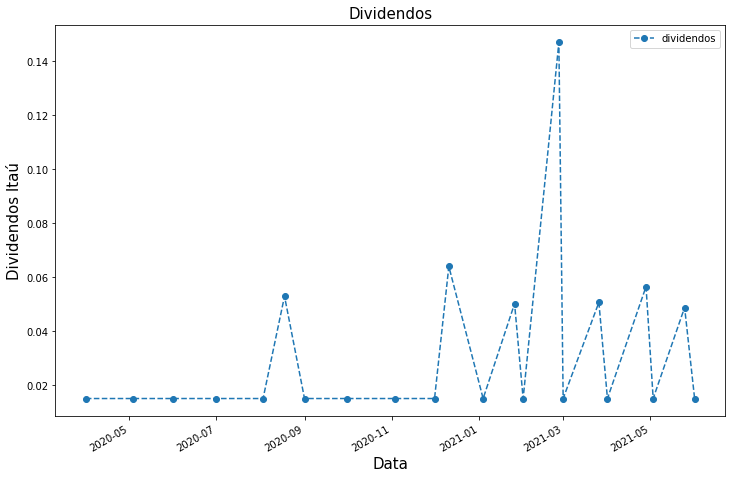

In [38]:
#Podemos também saber o quanto cada papel gerou de dividendos
div_itau=pd.DataFrame(itau.dividends).loc['2020-03-23':'2021-06-07'].rename(columns={"Dividends":"dividendos"})
div_itau.plot(figsize=(12,8),linestyle='--',marker='o')
plt.title("Dividendos",fontsize=15)
plt.xlabel("Data",fontsize=15)
plt.ylabel("Dividendos Itaú",fontsize=15)


Text(0, 0.5, 'Dividendos Bradesco')

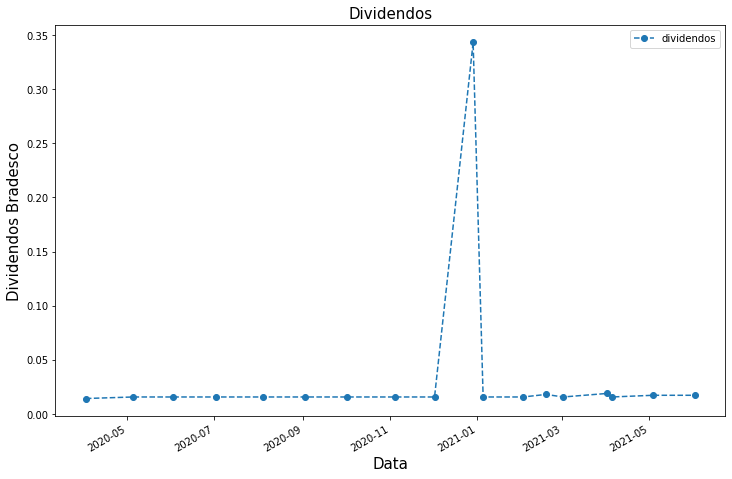

In [39]:
div_bra=pd.DataFrame(bradesco.dividends).loc['2020-03-23':'2021-06-07'].rename(columns={"Dividends":"dividendos"})
div_bra.plot(figsize=(12,8),linestyle='--',marker='o')
plt.title("Dividendos",fontsize=15)
plt.xlabel("Data",fontsize=15)
plt.ylabel("Dividendos Bradesco",fontsize=15)

Text(0, 0.5, 'Dividendos Santander')

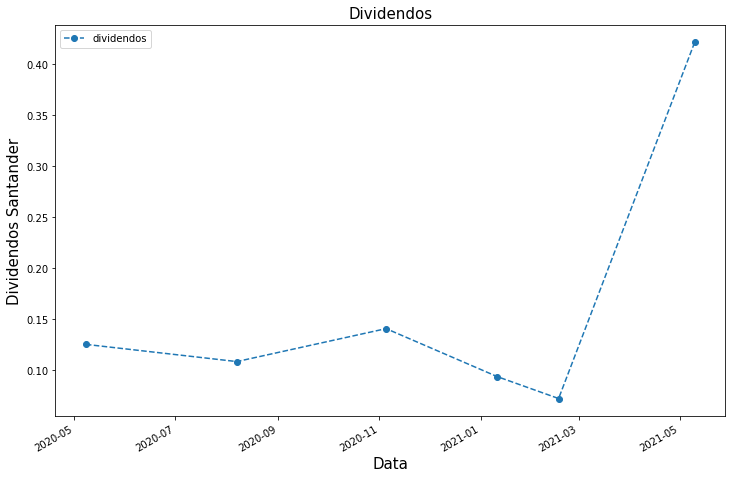

In [40]:
div_sant=pd.DataFrame(santander.dividends).loc['2020-03-23':'2021-06-07'].rename(columns={"Dividends":"dividendos"})
div_sant.plot(figsize=(12,8),linestyle='--',marker='o')
plt.title("Dividendos",fontsize=15)
plt.xlabel("Data",fontsize=15)
plt.ylabel("Dividendos Santander",fontsize=15)

In [41]:
Total=div_sant.sum()
print("Dividendos do Itaú:",Total)
Total=div_bra.sum()
print("Dividendos do Bradesco:",Total)
Total=div_itau.sum()
print("Dividendos do Itaú:",Total)

Dividendos do Itaú: dividendos    0.960544
dtype: float64
Dividendos do Bradesco: dividendos    0.617134
dtype: float64
Dividendos do Itaú: dividendos    0.694867
dtype: float64


### o Conselho Monetário Nacional(CMN) vetou a distribuição de dividendos além do mínimo obrigatório para os bancos de maio de 2020 até o fim do mesmo ano e isto fica claro nos gráficos apresentados. Com o fim da medida no ano de 2021 podemos ver um aumento no pagamento de dividendos .
 

###E se tivéssemos investido em um(ou todos) esses papéis,na prática,durante este período,qual seria o comportamento da nossa carteira?
###Abaixo irei demonstrar como isto teria ocorrido,considerando apenas uma alocação no dia 3 de maio de 2020 no valor de 10.000 reais em cada papel.


In [15]:
compras={"ITUB4.SA":10000,"BBDC4.SA":10000,"SANB4.SA":10000}
compras_df=pd.Series(data=compras,index=list(compras.keys()))

In [16]:
#Valor total de patrimônio alocado no primeiro dia(3 de maio de 2020)
sum(compras.values())

30000

In [17]:
#Constatei que não existiam valores nulos o que facilita a análise.
#É interessante ressaltar o número de ações compradas e evolução patrimonial com o passar do tempo .
dia_aporte=cotação.iloc[0]
ações_compradas=compras_df/dia_aporte
patrimônio=cotação* ações_compradas
patrimônio.info()
patrimônio['total']=patrimônio.iloc[:].sum(axis=1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 297 entries, 2020-03-23 to 2021-06-04
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ITUB4.SA  297 non-null    float64
 1   BBDC4.SA  297 non-null    float64
 2   SANB4.SA  297 non-null    float64
dtypes: float64(3)
memory usage: 9.3 KB


In [18]:
#Número de ações compradas
round(ações_compradas,0)

ITUB4.SA    512.0
BBDC4.SA    811.0
SANB4.SA    958.0
dtype: float64

In [19]:
patrimônio

,ITUB4.SA,BBDC4.SA,SANB4.SA,total
Date,,,,
2020-03-23,10000.000000,10000.000000,10000.000000,30000.000000
2020-03-24,10964.917533,11505.374557,11474.999904,33945.291994
2020-03-25,11500.978054,12365.589694,12083.334932,35949.902680
2020-03-26,11817.742510,12625.917613,13000.000548,37443.660671
2020-03-27,11193.961414,11805.317779,11833.334886,34832.614079
...,...,...,...,...
2021-05-28,14811.575275,18704.263154,18973.016335,52488.854764
2021-05-31,14766.587234,18661.981370,18823.554881,52252.123485
2021-06-01,15304.237062,19084.834779,19526.908488,53915.980328


In [27]:
#Aqui temos os valores máximos alcançados.
round(patrimônio.max(),2)


ITUB4.SA    16164.24
BBDC4.SA    19831.68
SANB4.SA    20843.02
total       56334.71
dtype: float64

### Com esta rotina fica de fácil compreensão a evolução no tempo das cotações destas empresas,seu pagamento de proventos e até mesmo a evolução de uma carteira fictícia.Acredito que seja um ótimo ponto de partida para análise de outros setores,índices,commodities,etc... 
